Interactive Usage
=====

After intalling mmod, you can import individial classes (ImageDatabase, Experiment, Detector, CaffeNet, ...).

This is useful for debugging or verification.

Interactive ImageDatabase exploration
----------

In [7]:
from mmod.imdb import ImageDatabase
db=ImageDatabase('/mnt/data/Tax1300V14_1_with_bb/trainX.tsv')
db

ImageDatabase(type: tsv, index: TsvFile(size: 828587, labeled sources: 23, shuffle: Tax1300V14_1_with_bb/train.shuffle.txt))

In [8]:
key = db.normkey(10)
key

('data/mturk700_url_as_keyClean/trainval.tsv', 97, 10)

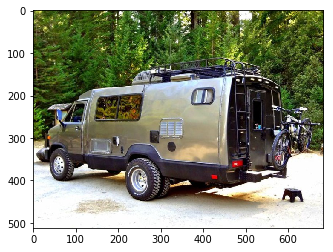

In [11]:
im = db.image(key)
imshow((im)[:,:,(2,1,0)].astype(np.uint8))

In [13]:
truth = db.truth_list(key)
truth

[{u'class': u'all terrain vehicle',
  u'merge_from': [{u'class': u'all terrain vehicle',
    u'rect': [12.057971014492754,
     67.71014492753623,
     619.5942028985507,
     478.60869565217394],
    u'workerId': u'A15NNYXDLCI2SR'},
   {u'class': u'all terrain vehicle',
    u'rect': [14.840579710144928,
     111.30434782608695,
     666.8985507246377,
     462.84057971014494],
    u'workerId': u'A3EBUBRYCKB6AF'},
   {u'class': u'all terrain vehicle',
    u'rect': [24.115942028985508,
     146.55072463768116,
     665.0434782608696,
     474.8985507246377],
    u'workerId': u'A1FW68HLKWGLGW'}],
  u'rect': [24.115942028985508,
   146.55072463768116,
   619.5942028985507,
   462.84057971014494]},
 {u'class': u'bicycle',
  u'conf': 0.8075434565544128,
  u'from': u'output/voc0712_darknet19_448_B/snapshot/model_iter_33102.caffemodel.mturk700_url_as_keyClean.trainval.maintainRatio.testInput320.416.640.predict',
  u'rect': [559.5964775085449,
   221.98594665527344,
   661.3844795227051,
   37

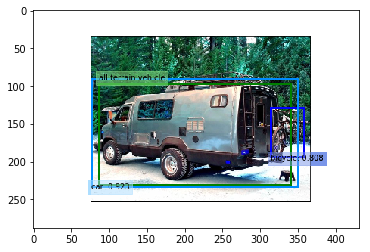

In [16]:
from mmod.visual import visualize
im2=visualize(im, truth)
imshow((im2)[:,:,(2,1,0)].astype(np.uint8))

(array([  5.01440000e+04,   4.04200000e+03,   5.92000000e+02,
          1.01000000e+02,   3.50000000e+01,   1.60000000e+01,
          4.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([   1. ,   19.4,   37.8,   56.2,   74.6,   93. ,  111.4,  129.8,
         148.2,  166.6,  185. ]),
 <a list of 10 Patch objects>)

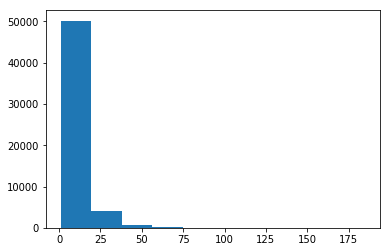

In [18]:
person_bboxes = []
for key in db.iter_label("person"):
    person_bboxes.append(len(db.truth_list(key)))
hist(person_bboxes)

Interactive Network
-----
For exploration, during development and for debugging and verification it will be useful to create a network and explore the performance without having to deal with the entire training/evaluation script.

In [23]:
import os.path as op
import torch
from mtorch.caffenet import CaffeNet

protofile = "/mnt/qd_output/Tax1300_V2_1_darknet19_p_bb_only/train_small.prototxt"
caffemodel = "/mnt/qd_output/Tax1300_V2_1_darknet19_p_bb_only/snapshot/model_iter_522264.caffemodel"
assert op.isfile(protofile) and op.isfile(caffemodel)

model = CaffeNet(protofile, keep_diffs=True, verbose=True)
inputs = model.inputs

model.load_weights(caffemodel)

model = model.cuda()
inputs = inputs.cuda()
model

CaffeNet(
  (inputs): CaffeData(type=TsvBoxData, batch_size=2)
  (dark1/conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (dark1/bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (dark1/scale): Scale(channels = 32)
  (dark1/leaky): LeakyReLU(negative_slope=0.1, inplace)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (dark2/conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (dark2/bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (dark2/scale): Scale(channels = 64)
  (dark2/leaky): LeakyReLU(negative_slope=0.1, inplace)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (dark3a/conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (dark3a/bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (dark3a

In [26]:
data, labels = inputs()
data

tensor([[[[-1.7257e+01, -1.4080e+01, -1.2917e+01,  ..., -3.3702e+01,
           -3.8952e+01, -4.2457e+01],
          [-1.6277e+01, -1.4319e+01, -1.4377e+01,  ..., -3.3610e+01,
           -4.1657e+01, -4.4600e+01],
          [-1.5036e+01, -1.3833e+01, -1.4607e+01,  ..., -3.0432e+01,
           -3.8968e+01, -4.2147e+01],
          ...,
          [ 1.2601e+02,  1.4466e+02,  1.5100e+02,  ...,  1.3973e+02,
            1.5100e+02,  1.5100e+02],
          [ 1.3314e+02,  1.5029e+02,  1.5100e+02,  ...,  1.1167e+02,
            1.5100e+02,  1.5100e+02],
          [ 1.4611e+02,  1.5100e+02,  1.5100e+02,  ...,  5.7099e+01,
            9.0286e+01,  1.1674e+02]],

         [[ 1.3912e+01,  1.6366e+01,  1.6613e+01,  ...,  8.0860e+00,
            3.0438e+00, -7.9279e-01],
          [ 1.4607e+01,  1.5658e+01,  1.4553e+01,  ...,  7.7702e+00,
           -4.7659e-01, -4.8702e+00],
          [ 1.4510e+01,  1.4620e+01,  1.2713e+01,  ...,  1.0900e+01,
            1.9617e+00, -2.6489e+00],
          ...,
     

In [33]:
loss = model(data, labels)
crit = torch.sum(loss)
crit.backward()
print(loss)
{tname: model.blobs.get(tname).item() for tname in model.targets}

tensor([ 0.0411,  1.5867,  0.0307,  0.1196,  0.0568], device='cuda:0')


{'o_noobj_loss': 0.041077870875597,
 'o_obj_loss': 0.05676642060279846,
 'softmaxtree_loss': 1.5866835117340088,
 'wh_loss': 0.119639553129673,
 'xy_loss': 0.030689328908920288}

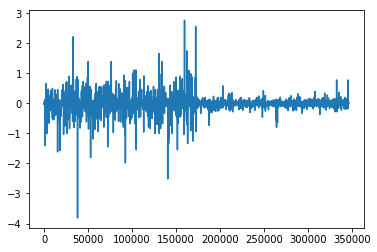

In [35]:
plot(model.diffs['extra_conv19'].cpu().numpy().flatten())